<a href="https://colab.research.google.com/github/B-JayU/Python_study/blob/main/5_3_%ED%8C%8C%EC%9D%B4%EC%8D%AC_EDA_%EC%88%98%EC%B9%98%ED%98%95_%EB%B3%80%EC%88%98_input_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import seaborn as sns

In [2]:
print(pd.__version__)
print(sns.__version__)

1.1.5
0.11.1


In [3]:
# 0.11.0 버전에서 변화가 많으니 이 버전 이상을 사용해 주세요. 
# !pip install seaborn --upgrade

## 데이터셋 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

* seaborn 데이터셋 위치 : https://github.com/mwaskom/seaborn-data

In [4]:
# df
df = sns.load_dataset("mpg")
df.shape

(398, 9)

## 데이터셋 일부만 가져오기

In [5]:
# head
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [6]:
# tail
df.tail(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [7]:
# sample
df.sample(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
174,18.0,6,171.0,97.0,2984,14.5,75,usa,ford pinto
118,24.0,4,116.0,75.0,2158,15.5,73,europe,opel manta
276,21.6,4,121.0,115.0,2795,15.7,78,europe,saab 99gle
307,26.8,6,173.0,115.0,2700,12.9,79,usa,oldsmobile omega brougham


# 매번 봐야 하는 기술통게값 코드 한 줄로 보기

## Pandas Profiling



*   pandas-profiling/pandas-profiling:Create HTML profiling reports from pandas DataFrame objects



In [8]:
!pip install pandas_profiling==2.8.0

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [12]:
profile.to_file("pandas_profile_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 181 kB/s 


In [14]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 요약하기

In [ ]:
# info


## 결측치 보기

In [16]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [17]:
df.isnull().mean()

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

## 기술통계 보기

In [18]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [19]:
df.describe(include="object")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


## 히스토그램과 분포
* 히스토그램(histogram)은 표로 되어 있는 도수 분포를 정보 그림으로 나타낸 것
* 도수 분포(度數分布, frequency distribution) 또는 빈도분포는 표본의 다양한 산출 분포를 보여주는 목록, 표, 그래프
* 표에 들어가는 각 항목은 특정 그룹이나 주기 안에 값이 발생한 빈도나 횟수를 포함하고 있으며 이러한 방식으로 표는 표본 값의 분포를 요약

In [21]:
# 수치형 변수 mpg의 unique 값 보기
df["mpg"].unique()
df["mpg"].nunique()

129

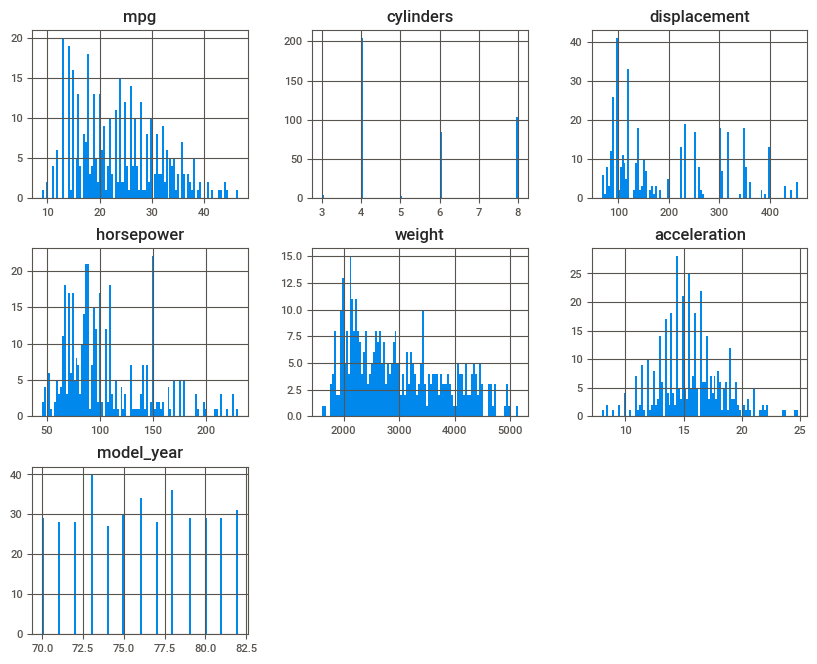

In [26]:
# hist()를 통해 전체 수치변수에 대한 히스토그램 그리기
_ = df.hist(figsize=(10,8), bins=100)

### 비대칭도(왜도)
* 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표
* 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있음
* 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포
* 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포
* 평균과 중앙값이 같으면 왜도는 0

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="300">

출처 : https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84

In [27]:
# skew를 통해 전체 수치변수에 대한 왜도 구하기
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

### 첨도 
* 확률분포의 뾰족한 정도를 나타내는 척도
* 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용
* 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가까움
* 3보다 작을 경우에는(K<3) 산포는 정규분포보다 더 뾰족한 분포(꼬리가 얇은 분포)
* 첨도값이 3보다 큰 양수이면(K>3) 정규분포보다 더 완만한 납작한 분포(꼬리가 두꺼운 분포)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1920px-Normal_Distribution_PDF.svg.png" width="300">

출처 : https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84

In [28]:
# kurt를 통해 전체 수치변수에 대한 첨도 구하기
df.kurt()

mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model_year     -1.181232
dtype: float64

### 1개의 수치변수


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1280px-Boxplot_vs_PDF.svg.png" width="300">

이미지 출처 : https://en.wikipedia.org/wiki/Box_plot

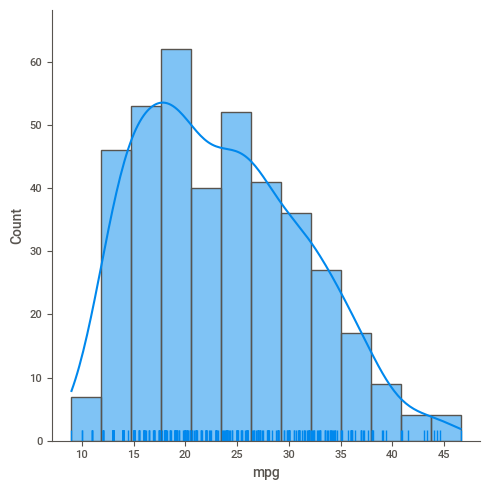

In [39]:
# displot을 통해 히스토그램과 kdeplot 그리기
sns.displot(data=df, x="mpg", kde=True, rug=True)

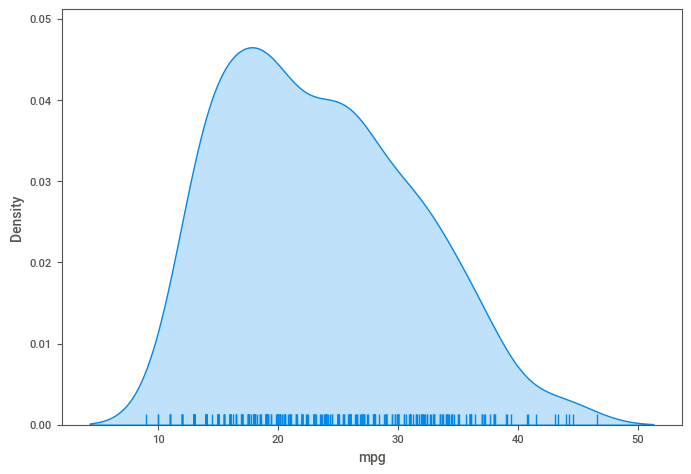

In [43]:
# kdeplot, rugplot으로 밀도함수 표현하기
sns.kdeplot(data=df, x="mpg", shade=True, cut=2)
sns.rugplot(data=df, x="mpg")

In [44]:
# mpg 값에 대해 agg로 skew, kurt 값 구하기
# 특정 변수값에 대한 통계적 값을 확인 할 수 있다.
df["mpg"].agg(["skew", "kurt"])

skew    0.457066
kurt   -0.510781
Name: mpg, dtype: float64

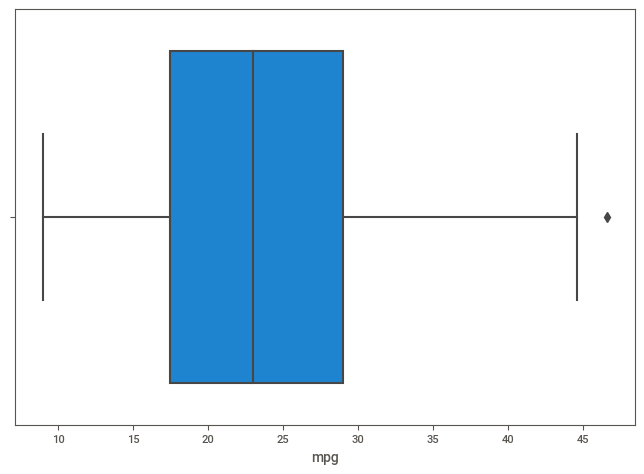

In [46]:
# boxplot 으로 mpg 의 사분위 수 표현하기
# 다이아 모양은 이상치 값을 의미
# 박스의 가장자리는 각 25%, 75% 의미하고
# 박스의 정중앙이 50% 를 의미한다. 

sns.boxplot(data=df, x="mpg")

In [52]:
# describe 로 mpg의 기술통계 값 구하기
df["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

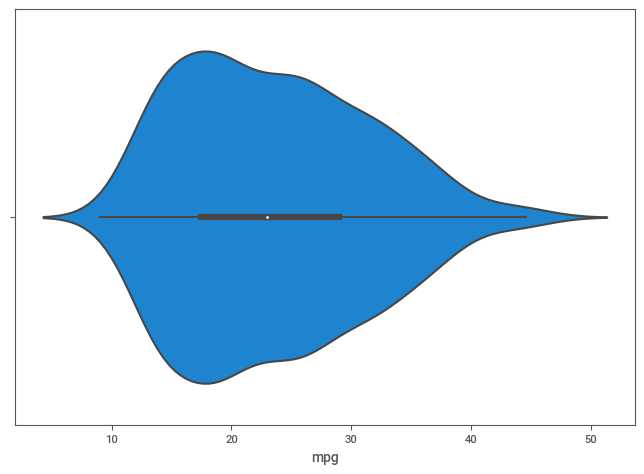

In [53]:
# violinplot 으로 mpg 값 좀 더 자세히 보기
sns.violinplot(data=df, x="mpg")

### boxplot과 kdeplot

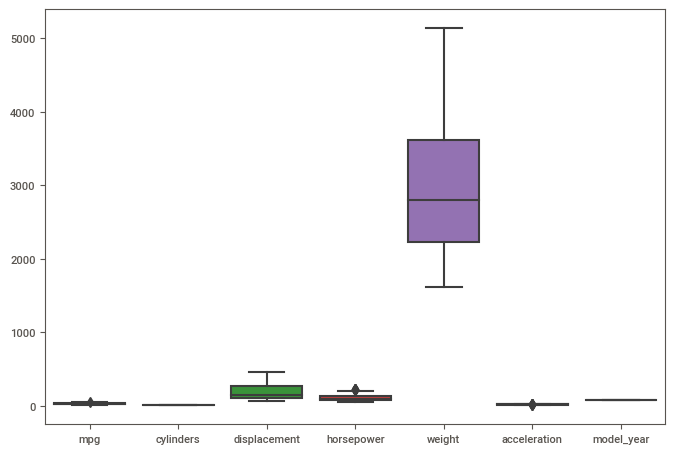

In [54]:
# boxplot 으로 전체 변수 시각화하기
sns.boxplot(data=df)

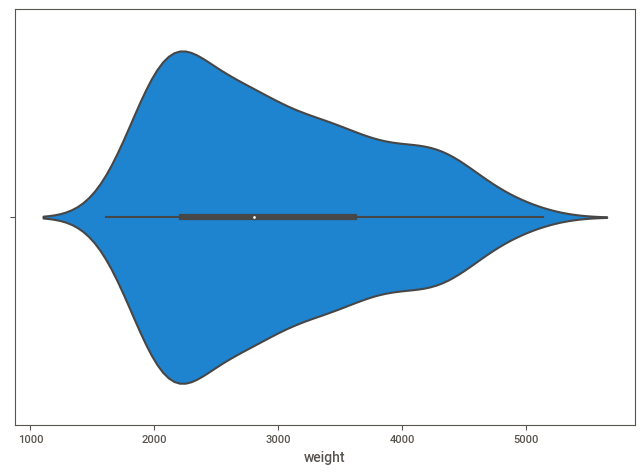

In [59]:
# viloinplot 으로 전체 변수 시각화하기
sns.violinplot(data=df, x="weight")

### 2개 이상의 수치변수

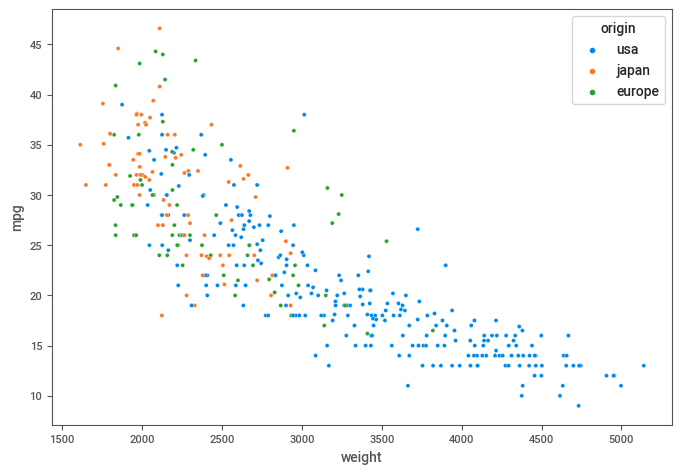

In [65]:
# scatterplot 을 통해 2개의 수치변수 비교하기
sns.scatterplot(data=df, x="weight", y="mpg", hue="origin")

### 회귀 시각화

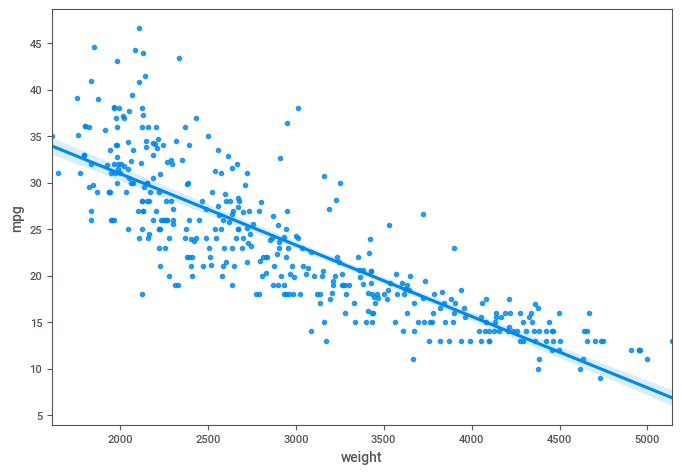

In [63]:
# regplot 으로 회귀선 그리기
sns.regplot(data=df, x="weight", y="mpg")

### 잔차 시각화

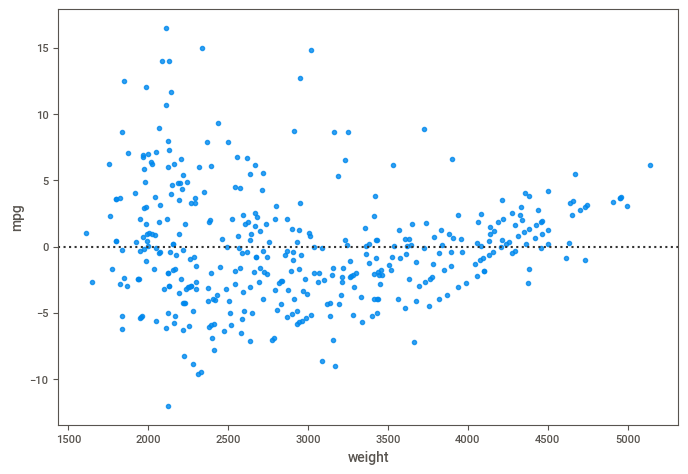

In [64]:
# 회귀선의 잔차를 시각화 하기
sns.residplot(data=df, x="weight", y="mpg")

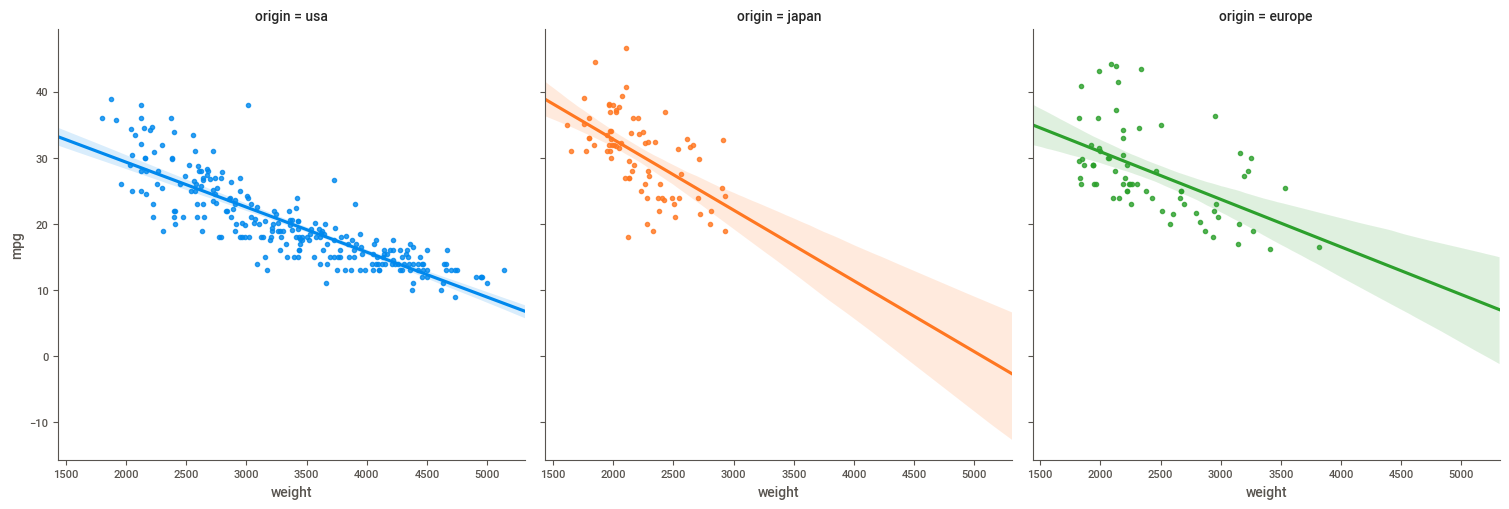

In [68]:
# lmplot 을 통해 범주값에 따라 색상, 서브플롯 그리기
# 회귀선의 색상을 hue에 따라 다르게 표현하기
# categori 별로 다른 색상으로도 표현가능하고, 각각 따로 서브플롯으로도 나타낼 수 있다.

sns.lmplot(data=df, x="weight", y="mpg", hue="origin", col="origin", truncate=False)

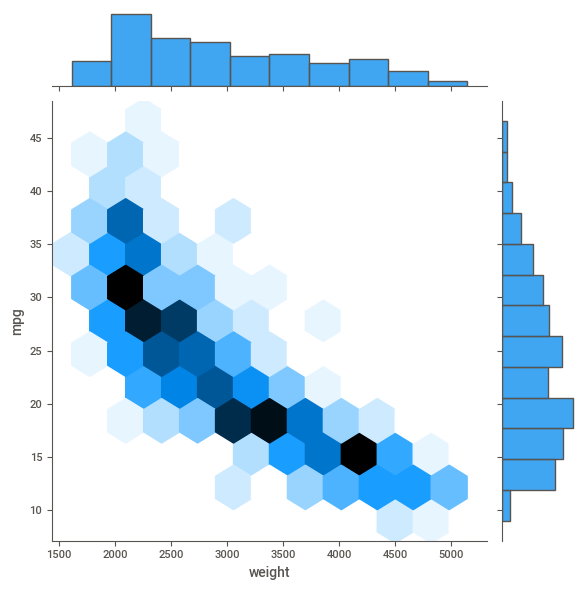

In [71]:
# jointplot 2개의 수치변수 표현하기
sns.jointplot(data=df, x="weight", y="mpg", kind="hex")

### pairplot

In [73]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그려보고(100개)
# 샘플의 수를 늘려가며 그리는 걸 추천합니다.
# df_sample

df_sample = df.sample(100)
df_sample.shape

(100, 9)

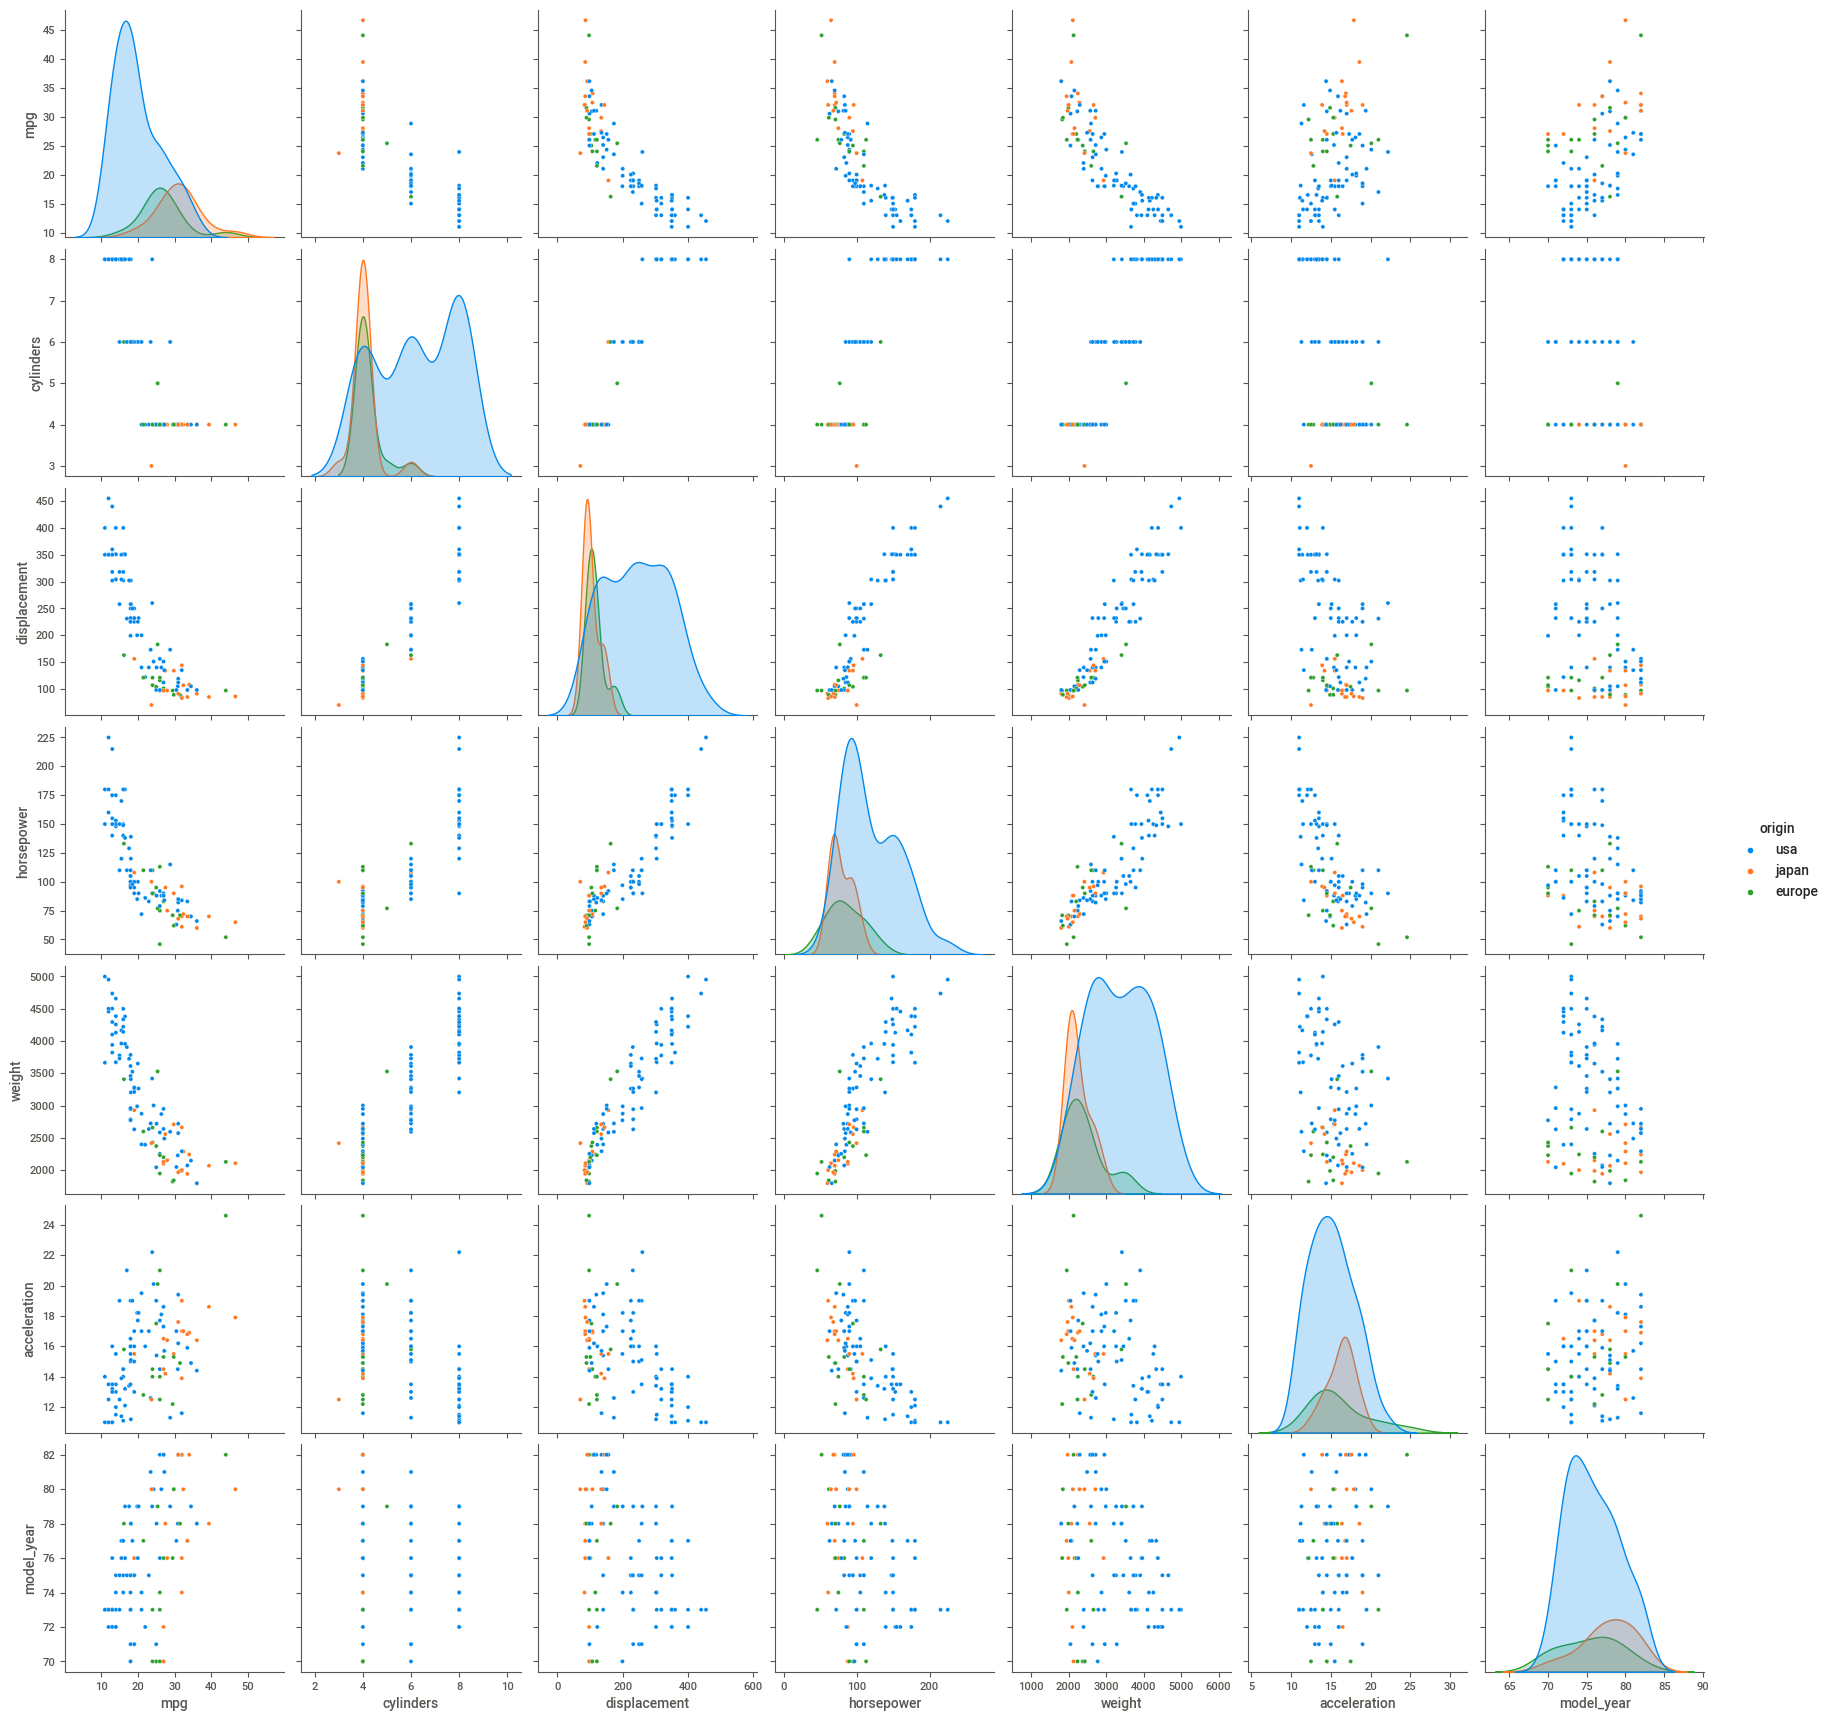

In [75]:
# origin 값에 따라 다른 색상으로 그리기
sns.pairplot(data=df_sample, hue="origin")

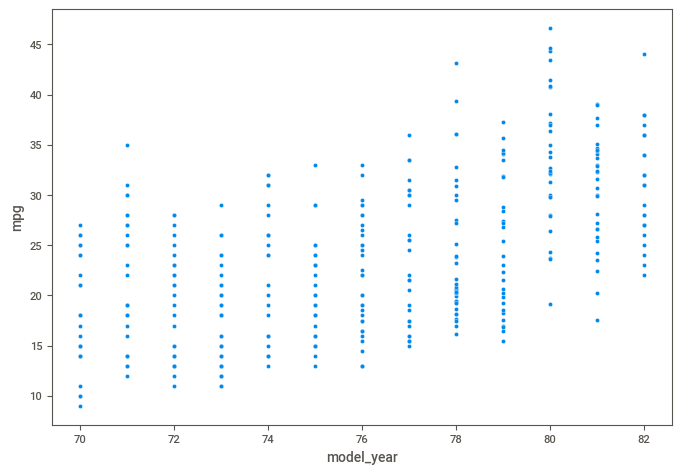

In [78]:
sns.scatterplot(data=df, x="model_year", y="mpg")

### lineplot

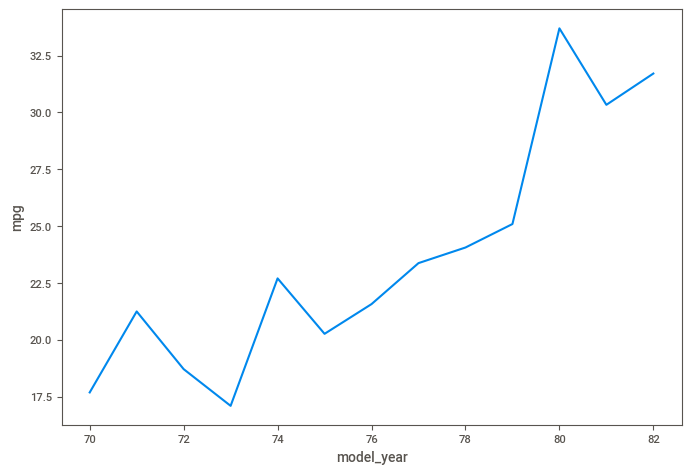

In [79]:
# lineplot으로 model_year, mpg를 시각화 합니다.
sns.lineplot(data=df, x="model_year", y="mpg", ci=None)

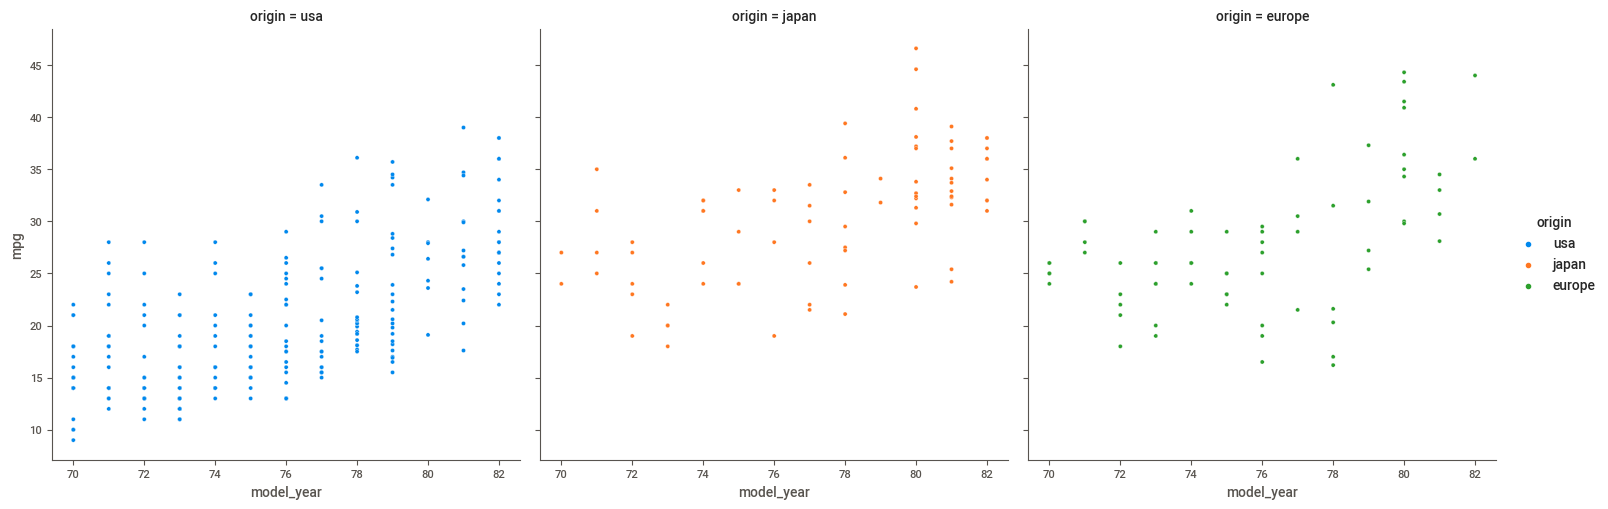

In [84]:
# relplot 으로 수치 변수에 따라 서브플롯을 그립니다.
# 수치 변수에 의한 관계를 scatterplot을 기본형으로 하여 그린다.
sns.relplot(data=df, x="model_year", y="mpg", hue="origin", col="origin")

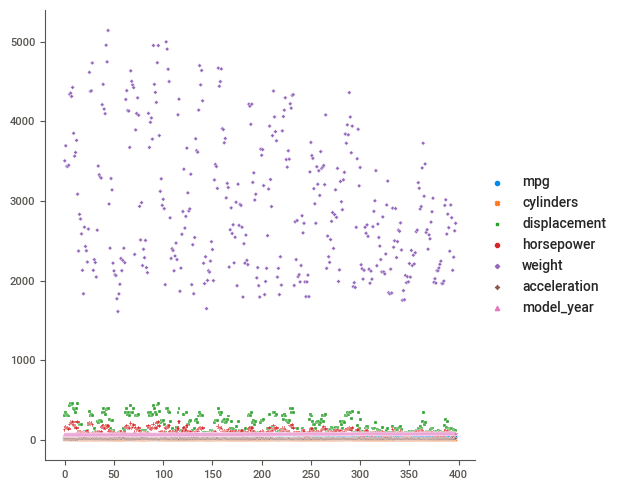

In [85]:
# relplot 으로 전체 수치 변수에 대한 시각화를 합니다.
sns.relplot(data=df)

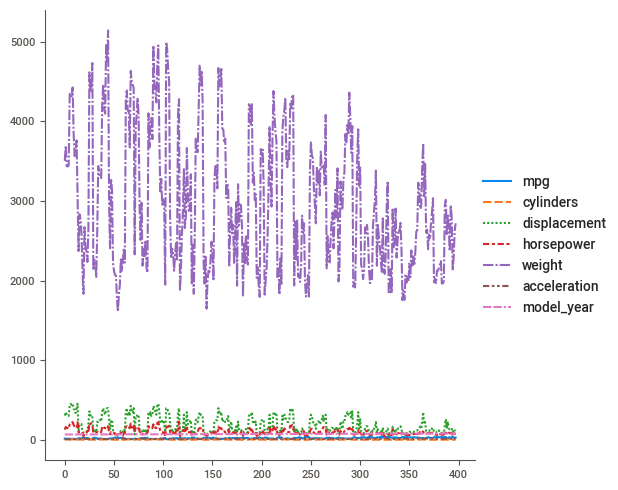

In [86]:
# relplot 의  kind 옵션을 통해 선그래프를 그립니다.
sns.relplot(data=df, kind="line")


### 상관분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

#### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width=500>

* 출처 :  https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98



#### 상관계수 구하기

In [91]:
import numpy as np

In [89]:
# 데이터프레임 전체의 수치변수에 대해 상관계수를 구합니다.
corr = df.corr()

In [94]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 생성

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
# mask 
mask = np.triu(np.ones_like(corr))

In [103]:
import matplotlib.pyplot as plt

In [104]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

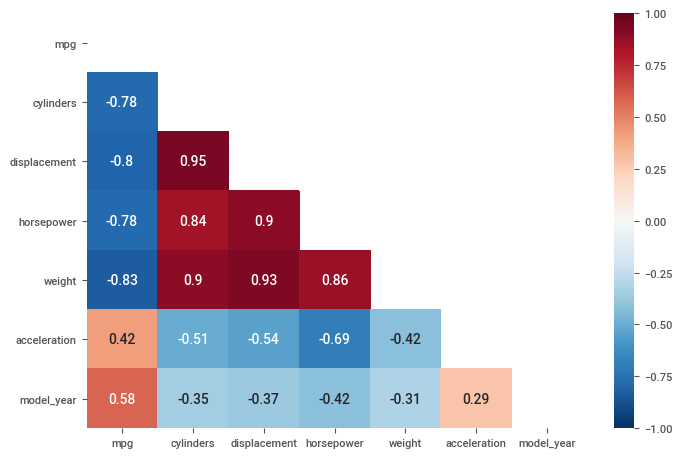

In [100]:
# heatmap 을 통해 상관계수를 시각화 합니다.
sns.heatmap(corr, annot=True, cmap="RdBu_r", vmax=1, vmin=-1, mask=mask)